In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

from astropy.table import Table

%matplotlib inline

/home/hillysson/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Read cluster catalogue

https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/RedMaPPer_on_Y1A1 


In [2]:
clusters = Table.read('/home/hillysson/diffuselight_dataproc/dlight/input/y1a1_gold_1.0.3-d10-mof-001d_run_redmapper_v6.4.17-vlim_lgt20_desformat_catalog.fit')

In [3]:
members = Table.read('/home/hillysson/diffuselight_dataproc/dlight/input/y1a1_gold_1.0.3-d10-mof-001d_run_redmapper_v6.4.17-vlim_lgt20_desformat_catalog_members.fit')

In [4]:
print(clusters.colnames)

['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG', 'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z', 'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC', 'GEOMASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ', 'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE', 'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG', 'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT', 'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT', 'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT', 'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD', 'ZMAG', 'ZMAG_ERR', 'ZLUM', 'BCG_ZLUM']


In [5]:
print(members.colnames)

['MEM_MATCH_ID', 'Z', 'RA', 'DEC', 'R', 'P', 'PFREE', 'THETA_I', 'THETA_R', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG_FIT', 'REFMAG_FIT_E', 'REFMAG', 'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED2', 'ZRED2_E', 'CHISQ', 'EBV', 'ZSPEC', 'ID', 'ZMAG', 'ZMAG_ERR']


# Members properties

(incomplete information, see above)

MEM_MATCH_ID         unique id for each cluster

Z                    redshift z_lambda for the cluster

RA

DEC

R                    distance to cluster center (h^-1 Mpc)

P                    membership probability of galaxy (in absence of percolation)

PFREE                probability galaxy has been percolated (masked by higher ranked cluster)

ID                   COADD_OBJECTS_ID of galaxy
   

(array([ 261.,  481.,  748.,  960., 1433., 1366., 1372.,  438.,    4.,
           3.]),
 array([0.10037247, 0.17610171, 0.25183097, 0.32756022, 0.40328947,
        0.47901872, 0.55474794, 0.6304772 , 0.70620644, 0.7819357 ,
        0.85766494], dtype=float32),
 <a list of 10 Patch objects>)

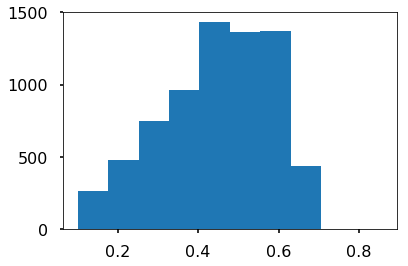

In [6]:
plt.hist(clusters['Z_LAMBDA'])

# Redshift cut

In [7]:
zmask = (clusters['Z_LAMBDA']>=0.2) * (clusters['Z_LAMBDA']<0.35)
clusters=clusters[zmask]

In [8]:
plt.hist(clusters['Z_LAMBDA'])

(array([ 90., 133., 127., 103., 148., 165., 161., 152., 125., 148.]),
 array([0.20000643, 0.21499664, 0.22998685, 0.24497707, 0.25996727,
        0.27495748, 0.28994772, 0.30493793, 0.31992814, 0.33491835,
        0.34990856], dtype=float32),
 <a list of 10 Patch objects>)

# Rmem calculation

In [9]:
pm = members['P']*members['PFREE']*members['THETA_R']*members['THETA_I']

In [10]:
Pcrit = (pm > 0.8)

In [11]:
Rmem = []
for clid in clusters['MEM_MATCH_ID']:
    clusterid = (members['MEM_MATCH_ID'] == clid)
    pi = pm[clusterid]
    Ri = members['R'][clusterid]
    Rmem.append(np.sum(pi*Ri)/clusters['LAMBDA_CHISQ'][clusters['MEM_MATCH_ID'] == clid])
Rmem = np.array(Rmem)

In [12]:
Rmemcut = []
for clid in clusters['MEM_MATCH_ID']:
    clusterid = (members['MEM_MATCH_ID'] == clid)
    pi = pm[Pcrit*clusterid]
    Ri = members['R'][Pcrit*clusterid]
    Rmemcut.append(np.sum(pi*Ri)/np.sum(pi))

In [13]:
Rmemcut = np.array(Rmemcut)

In [14]:
#mlambda = members.add_column

Text(0,0.5,'Rmemcut')

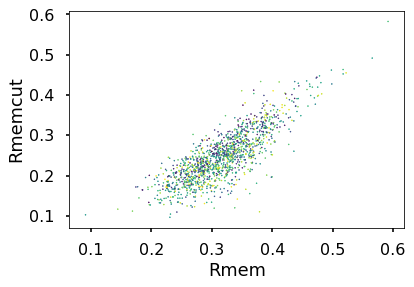

In [15]:
plt.scatter(Rmem, Rmemcut, 1, clusters['Z_LAMBDA'])
plt.xlabel('Rmem')
plt.ylabel('Rmemcut')

In [16]:
plt.scatter(clusters['LAMBDA_CHISQ'], Rmem, c=clusters['Z_LAMBDA'], s=1)
plt.xlim(20, 100)
plt.ylim(0, 0.6)
plt.xlabel('Lambda')
plt.ylabel('Rmem')

Text(0,0.5,'Rmem')

In [17]:
plt.figure(1, figsize=(10, 10))
plt.scatter(clusters['LAMBDA_CHISQ'], Rmemcut, c=clusters['Z_LAMBDA'], s=30)
clb = plt.colorbar()
clb.ax.set_title('z')
plt.xlim(20, 100)
plt.ylim(0, 0.6)
plt.xlabel('Lambda')
plt.ylabel('Rmemcut')

Text(0,0.5,'Rmemcut')

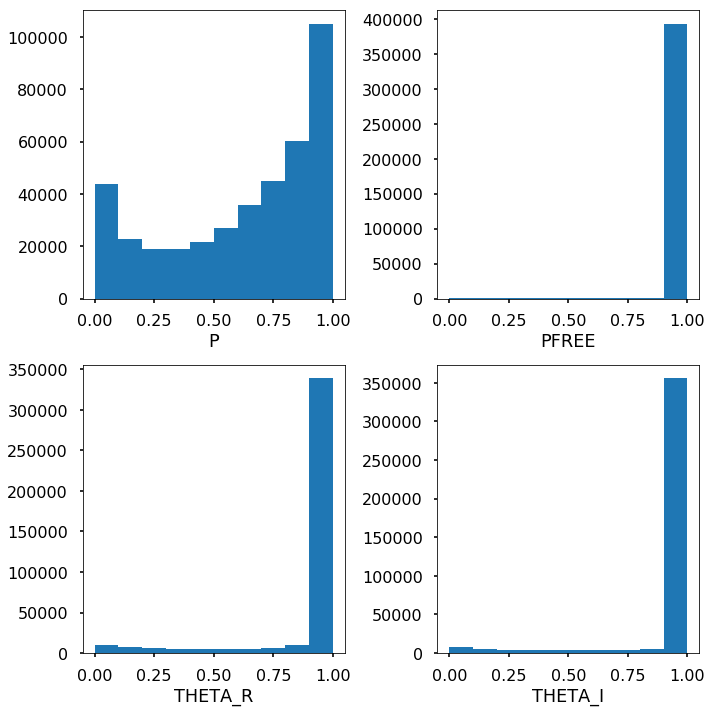

In [18]:
plt.figure(1, figsize=(10,10))
plt.subplot(221)
plt.hist(members['P'])
plt.xlabel('P')
plt.subplot(222)
plt.hist(members['PFREE'])
plt.xlabel('PFREE')
plt.subplot(223)
plt.hist(members['THETA_R'])
plt.xlabel('THETA_R')
plt.subplot(224)
plt.hist(members['THETA_I'])
plt.xlabel('THETA_I')
plt.tight_layout()

In [19]:
plt.hist(pm)

(array([79740., 30244., 21618., 18970., 18882., 20347., 25161., 34985.,
        52779., 96276.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

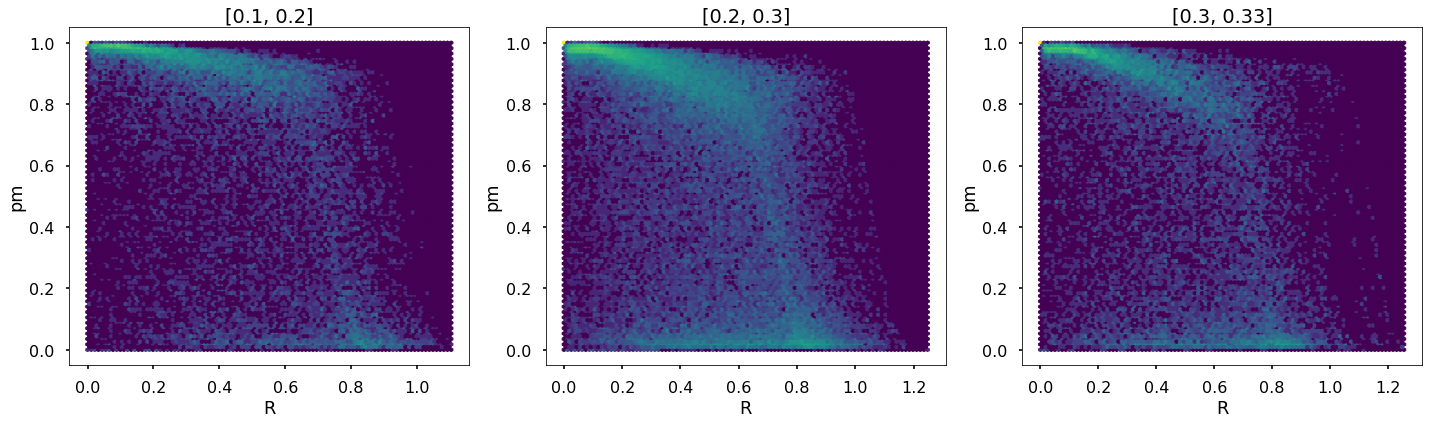

In [20]:
zranges = [[0.1, 0.2], [0.2, 0.3], [0.3, 0.33]]
plt.figure(1, figsize=(20, 6))
for i in range(3):
    plt.subplot('13%d'%(i+1))
    zrange = zranges[i]
    zmask = (members['Z'] >= zrange[0])*(members['Z'] < zrange[1])
    plt.hexbin(members['R'][zmask], pm[zmask], bins='log')
    plt.title(zrange)
    plt.xlabel('R')
    plt.ylabel('pm')
    plt.tight_layout()

Text(0,0.5,'Rmemcut')

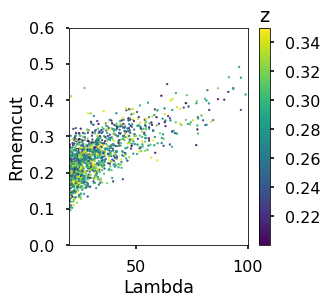

In [21]:
plt.figure(1, figsize=(4, 4))
plt.scatter(clusters['LAMBDA_CHISQ'], Rmemcut, c=clusters['Z_LAMBDA'], s=3)
clb = plt.colorbar()
clb.ax.set_title('z')
plt.xlim(20, 100)
plt.ylim(0, 0.6)
plt.xlabel('Lambda')
plt.ylabel('Rmemcut')

In [22]:
np.arange(20, 201, 20)

array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])

In [23]:
ngalsbins=np.arange(20, 201, 20)
ngals_median = ngalsbins[:-1]+(ngalsbins[1:]-ngalsbins[:-1])/2

Rmemcut_median=[]
for ii in range(len(ngalsbins)-1):
    mask = (clusters['LAMBDA_CHISQ']>=ngalsbins[ii]) * (clusters['LAMBDA_CHISQ']<ngalsbins[ii+1])
    cut_m = np.median(Rmemcut[mask])
    Rmemcut_median.append(cut_m)

nn, =np.where((np.array(Rmemcut_median)>=-1000000)*(np.array(Rmemcut_median)<=1000000))
ngals_median, Rmemcut_median = np.array(ngals_median)[nn], np.array(Rmemcut_median)[nn]
print(ngals_median, Rmemcut_median)
coefs = np.polyfit(ngals_median, Rmemcut_median, 1)
print(coefs)

[ 30.  50.  70.  90. 110. 130. 150. 190.] [0.22495905 0.30190188 0.34391922 0.4032303  0.42922783 0.41607165
 0.4195043  0.5826044 ]
[0.00186408 0.19910918]


/home/hillysson/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/hillysson/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.


Text(0,0.5,'Rmemcut')

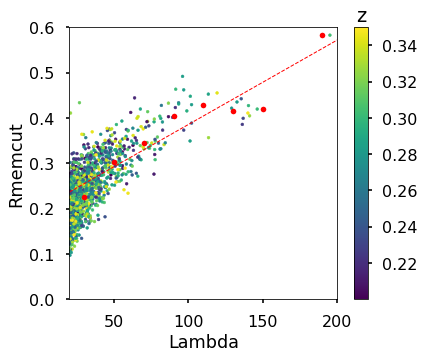

In [24]:
plt.figure(1, figsize=(6, 5))
plt.scatter(clusters['LAMBDA_CHISQ'], Rmemcut, c=clusters['Z_LAMBDA'], s=8)
plt.plot(ngals_median, Rmemcut_median, '.', color='r', label='median')
plt.plot(ngalsbins, coefs[0]*np.array(ngalsbins)+coefs[1], '--',lw=1, color='r', label='median fitting')
clb = plt.colorbar()
clb.ax.set_title('z')
plt.xlim(20, 200)
plt.ylim(0, 0.6)
plt.xlabel('Lambda')
plt.ylabel('Rmemcut')

In [26]:
R1 = Rmemcut
R2 = coefs[0]*np.array(clusters['LAMBDA_CHISQ'])+coefs[1]
diff = (R1-R2)>=0

lambda_up, Rmemcut_up = np.array(clusters['LAMBDA_CHISQ'])[diff], np.array(Rmemcut)[diff]
lambda_low, Rmemcut_low = np.array(clusters['LAMBDA_CHISQ'])[~diff], np.array(Rmemcut)[~diff]

Text(0,0.5,'Rmemcut')

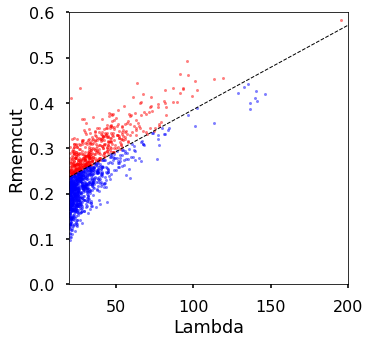

In [28]:
plt.figure(1, figsize=(5, 5))
plt.plot(lambda_up, Rmemcut_up, 'ro', markersize=3, alpha=0.5)
plt.plot(lambda_low, Rmemcut_low, 'bo', markersize=3, alpha=0.5)
plt.plot(ngalsbins, coefs[0]*np.array(ngalsbins)+coefs[1], '--',lw=1, color='k', label='median fitting')
plt.xlim(20, 200)
plt.ylim(0, 0.6)
plt.xlabel('Lambda')
plt.ylabel('Rmemcut')